<a href="https://colab.research.google.com/github/fridaruh/ML_and_IA_for_Finance/blob/master/Arbol_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar las librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importar datos desde Google Drive:

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/income.csv')

In [5]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bi
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


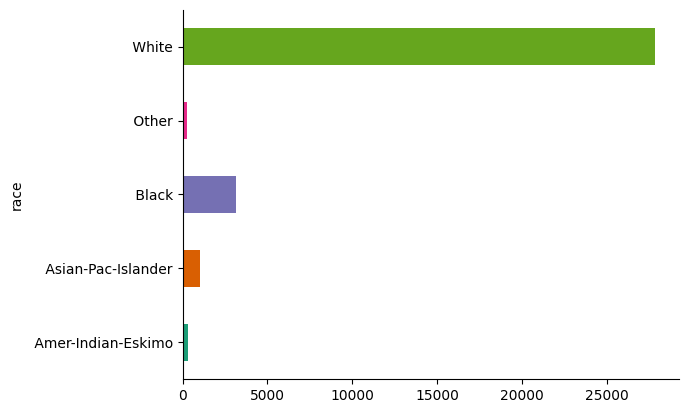

In [6]:
# @title race

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='sex'>

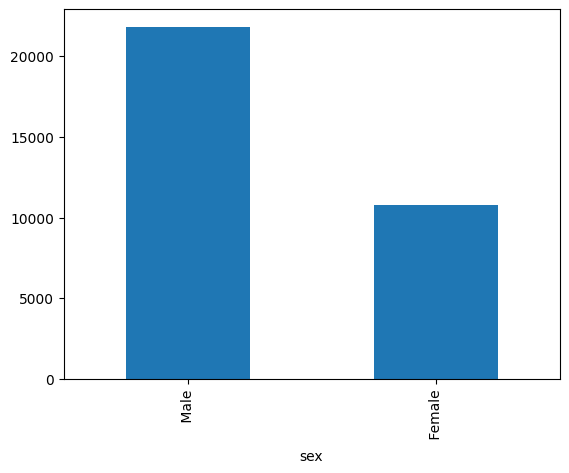

In [7]:
df['sex'].value_counts().plot(kind='bar')

In [8]:
df.shape

(32560, 17)

In [9]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_bi'],
      dtype='object')

<Axes: xlabel='native-country'>

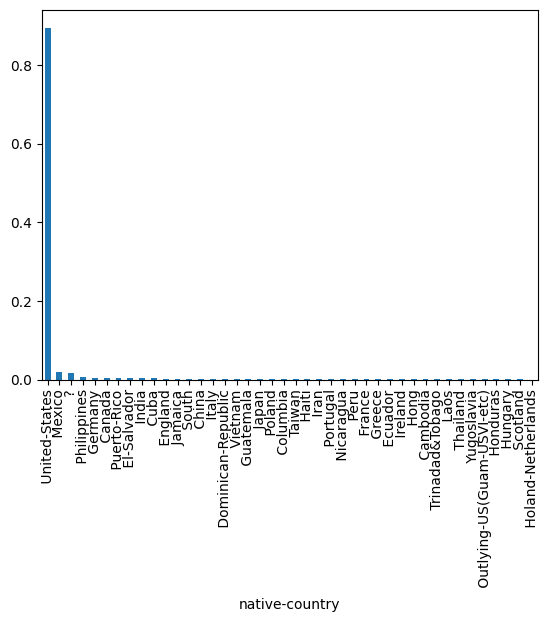

In [12]:
df['native-country'].value_counts(normalize=True).plot(kind='bar') #normalize obtiene la información de manera porcentual

In [13]:
df = df.drop(['Unnamed: 0','fnlwgt','capital-gain', 'capital-loss','native-country'],axis=1) #Se eliminan algunas variables poco funcionales y otras para evitar sesgos

In [14]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'income',
       'income_bi'],
      dtype='object')

In [15]:
df['marital-status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [16]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income,income_bi
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K,0


In [ ]:
df['workclass'].unique() #Revisamos los valores que puede tomar esta variable

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
df = df.drop(['race'],axis=1) #Quitamos una variable más para eliminar sesgos

In [20]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'sex', 'hours-per-week', 'income',
       'income_bi'],
      dtype='object')

In [22]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,hours-per-week,income,income_bi
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,<=50K,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,<=50K,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,<=50K,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,<=50K,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,40,<=50K,0


# Variables dummies

Se convierten a dummies las variables cualitativas para extraer los textos de la base de datos y quedarnos unicamente con variables numéricas.

In [23]:
df_dummies = pd.get_dummies(df, columns=['workclass', 'education','marital-status', 'occupation', 'relationship', 'sex'])

<ipython-input-81-f2ccc9fa18ee>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

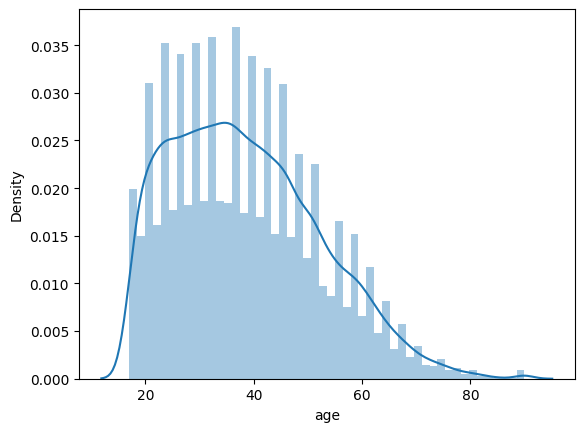

In [81]:
# prompt: grafica la variable age

sns.distplot(df['age'])


Se revisa la distribución de la variable "Age" y se obtiene matemáticamente los valores de los outliers (Dos desviaciones estandar hacia la izquierda y la derecha del promedio)

In [89]:


print(df['age'].std()) #Desviación estandar
print(df['age'].mean()) #Promedio

print(df['age'].mean()+ 2*df['age'].std()) #Límite de valores a la derecha
print(df['age'].mean()- 2*df['age'].std()) #Límite de valores a la izquierda

13.64064182746401
38.581633906633904
65.86291756156193
11.300350251705883


In [86]:
df_dummies.head()

,age,education-num,hours-per-week,income_bi,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,50,13,13,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,38,9,40,0,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,53,7,40,0,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
3,28,13,40,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,37,14,40,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False


In [25]:
df_dummies.columns

Index(['age', 'education-num', 'hours-per-week', 'income', 'income_bi',
       'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupat

In [28]:
df_dummies.shape

(32560, 59)

In [27]:
df_dummies = df_dummies.drop(['income'], axis=1)

# Entrenamiento

**Train, test split**

In [29]:
Y = df_dummies['income_bi'] #Nuestra variable target u objetivo

In [30]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_bi, Length: 32560, dtype: int64

In [38]:
# Se elimina del set de X la variable objetivo

X = df_dummies.drop(['income_bi'],axis=1) #Nos quedamos únicamente con las variables predictoras

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=99)

In [49]:
x_train.head()

,age,education-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
11618,51,12,45,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
14239,47,10,40,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
5098,46,10,40,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
22783,30,9,62,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
28564,23,10,20,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
X.shape

(32560, 63)

In [ ]:
x_train.shape

(26048, 63)

In [ ]:
x_test.shape

(6512, 63)

**Entrenamiento del modelo**

In [40]:
t = tree.DecisionTreeClassifier(max_depth=3)

In [54]:
model_2 = t.fit(x_train, y_train) #Trae otros datos aleatorios del random_state 99

In [50]:
model = t.fit(x_train, y_train) #Trae otros datos aleatorios 54

In [59]:
model.score(x_train, y_train) - model_2.score(x_train, y_train) #Aquí calcule la diferencia entre los números aleatorios selecc

0.005029176904176924

In [51]:
model.score(x_train, y_train) #modelo con 3 ramas.  0.8215601965601965

0.8223280098280098

In [55]:
model_2.score(x_train, y_train)

0.8215601965601965

In [52]:
model.score(x_test, y_test) #modelo con 3 ramas. 0.8158783783783784

0.8128071253071253

Probemos con un modelo de 5 ramas

In [56]:
t = tree.DecisionTreeClassifier(max_depth=5) #Cambio a 5 el parametro de max_depth

In [57]:
model = t.fit(x_train, y_train)

In [58]:
model.score(x_train, y_train) #modelo con 5 ramas

0.8265893734643734

In [60]:
model.score(x_test, y_test) #modelo con 5 ramas

0.8186425061425061

In [62]:
#Diferencia entre el score de entrenamiento y el score de prueba

model.score(x_train, y_train) - model.score(x_test, y_test)

0.007946867321867335

Probemos con un modelo de 30 ramas

In [63]:
t = tree.DecisionTreeClassifier(max_depth=30) #Cambio a 30 el parametro de max_depth

In [64]:
model = t.fit(x_train, y_train)

In [65]:
model.score(x_train, y_train) #modelo con 30 ramas

0.9608415233415234

In [66]:
model.score(x_test, y_test) #modelo con 30 ramas (muy específico, problema: sobreentrenamiento)

0.7837837837837838

In [67]:
#Diferencia entre el score de entrenamiento y el score de prueba

model.score(x_train, y_train) - model.score(x_test, y_test)

0.17705773955773962

## Hiperparametrización

Hacemos un loop para iterar sobre el número de ramas para encontrar el valor ideal para nuestro modelo y se evalua para cada iteración la precisión y la diferencia entre el set de entrenamiento y el set de prueba

In [69]:
  for numero in (range(1,30)):
    t = tree.DecisionTreeClassifier(max_depth=numero)
    model = t.fit(x_train, y_train)
    print('Con '+ str(numero)+ ' ramas')
    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print('Diferencia: '+ str(model.score(x_train, y_train) - model.score(x_test, y_test)))
    print('--------------')

Con 1 ramas
0.7598664004914005
0.7564496314496314
Diferencia: 0.00341676904176913
--------------
Con 2 ramas
0.8199861793611793
0.8167997542997543
Diferencia: 0.00318642506142508
--------------
Con 3 ramas
0.8215601965601965
0.8158783783783784
Diferencia: 0.005681818181818121
--------------
Con 4 ramas
0.8240555896805897
0.8195638820638821
Diferencia: 0.004491707616707585
--------------
Con 5 ramas
0.8265893734643734
0.8186425061425061
Diferencia: 0.007946867321867335
--------------
Con 6 ramas
0.8349969287469288
0.8269348894348895
Diferencia: 0.008062039312039304
--------------
Con 7 ramas
0.838835995085995
0.8246314496314496
Diferencia: 0.014204545454545414
--------------
Con 8 ramas
0.8432509213759214
0.8247850122850123
Diferencia: 0.01846590909090906
--------------
Con 9 ramas
0.8490479115479116
0.8244778869778869
Diferencia: 0.024570024570024662
--------------
Con 10 ramas
0.855382371007371
0.8220208845208845
Diferencia: 0.033361486486486513
--------------
Con 11 ramas
0.863022113

Nos quedaremos con el modelo de 3 ramas

In [72]:
t = tree.DecisionTreeClassifier(max_depth=3)
model = t.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8215601965601965
0.8158783783783784


# Gráfica del árbol de decisión

In [36]:
dimensiones = (25,25)

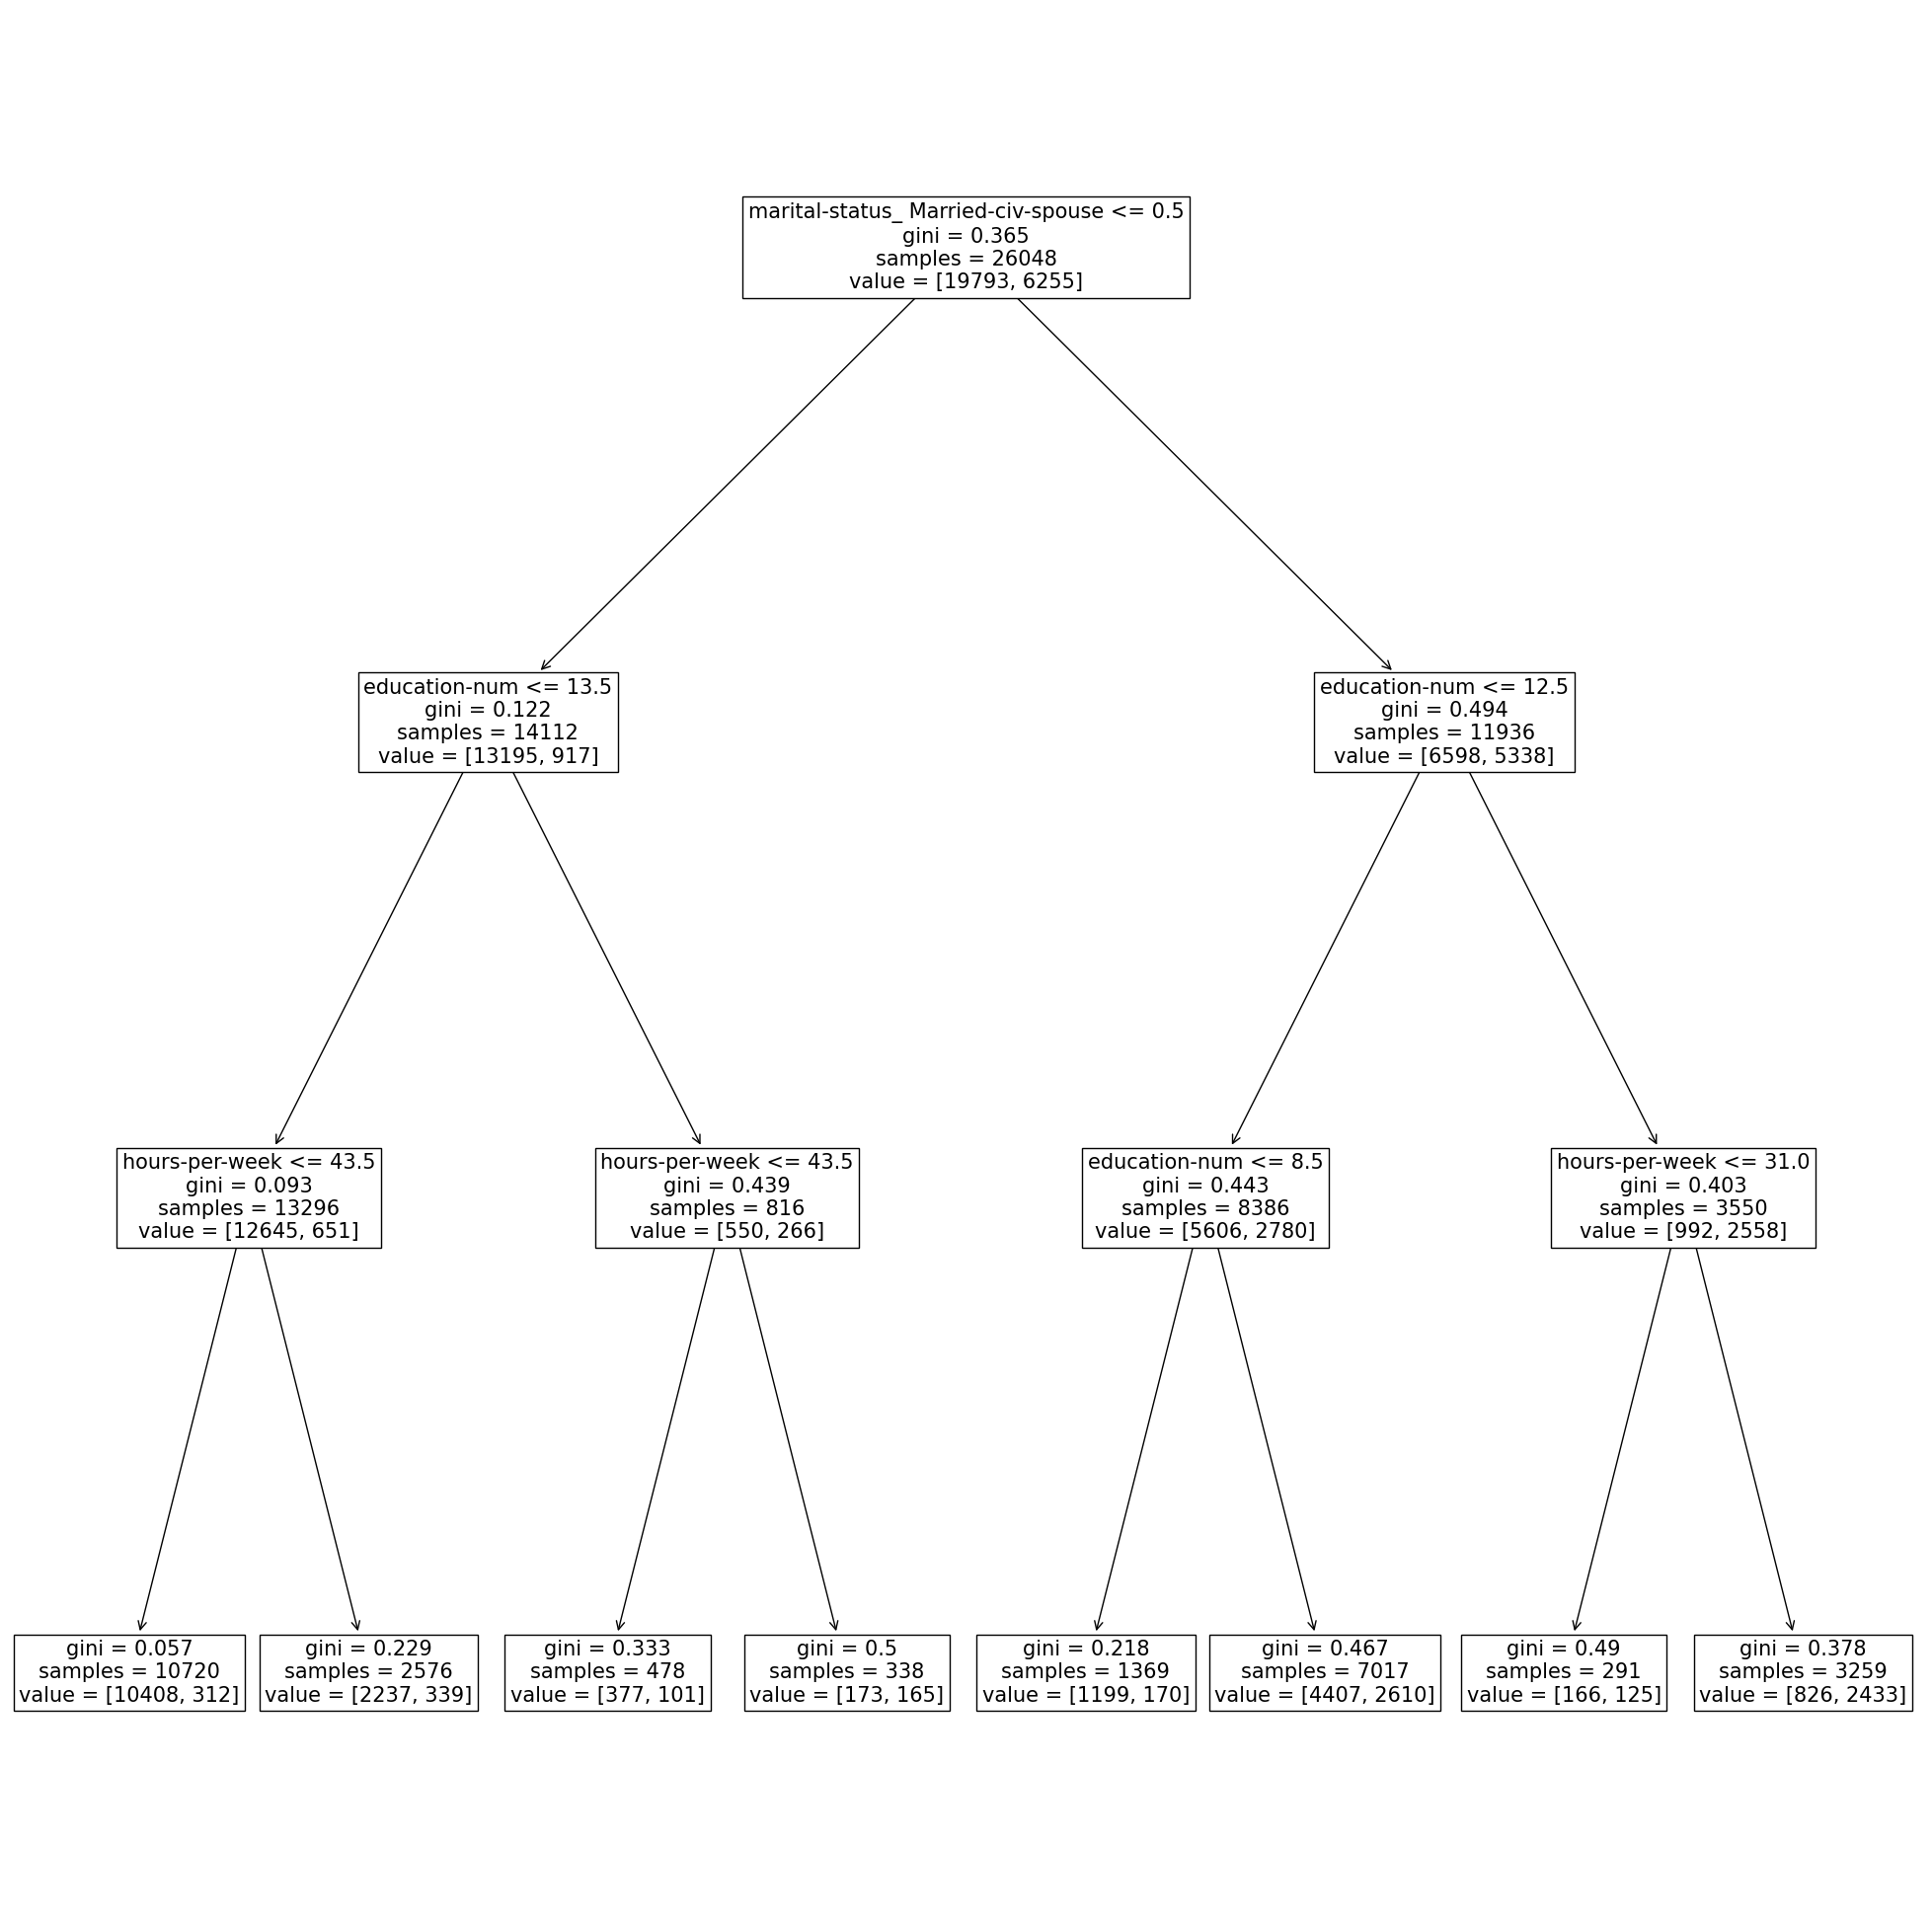

In [73]:
fig, ax = plt.subplots(figsize=dimensiones)
tree.plot_tree(t, feature_names=X.columns, fontsize=15)
plt.show()

# Métricas de evaluación

In [74]:
from sklearn.metrics  import confusion_matrix, classification_report

Generamos las predicciones utilizando el modelo seleccionado

In [75]:
y_pred = model.predict(x_test)

In [79]:
y_pred_entren = model.predict(x_train)

In [76]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
y_test

31849    0
3537     1
9258     0
20399    0
13644    1
        ..
1756     0
21440    0
1907     0
17378    0
26910    0
Name: income_bi, Length: 6512, dtype: int64

## Matriz de confusión

Evalúo la matriz de confusión sobre los datos de "test"

In [78]:
print(classification_report(y_pred,y_test)) #comparo los datos de la pred vs los datos reales

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5661
           1       0.39      0.73      0.51       851

    accuracy                           0.82      6512
   macro avg       0.67      0.78      0.70      6512
weighted avg       0.88      0.82      0.84      6512



Sólo para hacer double check evaluo también la matriz de confusión sobre los datos de "train"

In [80]:
print(classification_report(y_pred_entren,y_train))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     22789
           1       0.39      0.75      0.51      3259

    accuracy                           0.82     26048
   macro avg       0.67      0.79      0.70     26048
weighted avg       0.89      0.82      0.84     26048



## Extracción del modelo

In [90]:
import pickle

Genero el archivo "model.pkl" donde se va a guardar el modelo.

In [91]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Aplicación del modelo guardado

In [92]:
with open('model.pkl', 'rb') as file:
    time_traveler_model = pickle.load(file)

In [94]:
predictions = time_traveler_model.predict(x_test) #Se evalua el modelo sobre el set de test

In [95]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
x_test.head()

,age,education-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
31849,54,10,40,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3537,36,12,40,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
9258,60,6,40,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,True
20399,24,9,48,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
13644,40,10,17,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False


¿Qué pasaría si quito una columna del set de datos antes de meterlo al modelo para generar las predicciones?

In [97]:
x_test_2 = x_test.drop(['workclass_ ?'],axis=1)

In [98]:
x_test_2.head()

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
31849,54,10,40,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3537,36,12,40,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
9258,60,6,40,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,True
20399,24,9,48,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
13644,40,10,17,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False


El modelo no se ejecuta si no tenemos TOOODAS las columnas iguales a como se entrenó el modelo.

In [99]:
predictions_2 = time_traveler_model.predict(x_test_2)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- workclass_ ?


In [100]:
x_test_2.columns

Index(['age', 'education-num', 'hours-per-week', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'o

In [104]:
df['marital-status'].value_counts(normalize=True)

marital-status
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name: proportion, dtype: float64